<a href="https://colab.research.google.com/github/RanxduG/Sri-Lanka-Formaldehyde-Level-Analysis/blob/main/Monaragala_HCHO_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORTING GENERAL LIBRARIES**

In [19]:
import pandas as pd
import seaborn as sns
from google.colab import drive

#**LOADING DATASET**


In [20]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
Monaragala_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Full/monaragala_joined_data.csv')


#**PREPARING DATASET FOR ANAYSIS**


In [22]:
# Assuming 'date' column is in string format
Monaragala_data['date'] = pd.to_datetime(Monaragala_data['date'])


In [23]:
Monaragala_data.set_index('date', inplace=True)

In [24]:
Monaragala_data.rename(columns={'HCHO reading': 'HCHO_reading'}, inplace=True)

#**DESCRIBING DATA**


In [25]:
Monaragala_data.head()

,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,HCHO_reading,Location,Current Date,Next Date,month
date,,,,,,,,,,,,,,,
2019-01-01,21.79,21.98,14.53,87.00,0.22,97.05,4.27,28.44,6.35,28.25,0.000081,"Bibile, Monaragala",2019-01-01,2019-01-02,2019-01
2019-01-02,21.09,21.32,13.98,86.94,0.03,97.01,3.61,23.56,5.47,23.06,0.000019,"Bibile, Monaragala",2019-01-02,2019-01-03,2019-01
2019-01-03,21.03,21.18,13.67,86.06,0.03,97.06,3.85,11.69,5.88,10.88,0.000028,"Bibile, Monaragala",2019-01-03,2019-01-04,2019-01
2019-01-04,20.88,21.05,13.79,86.88,0.02,97.02,3.52,17.81,5.34,17.62,0.000037,"Bibile, Monaragala",2019-01-04,2019-01-05,2019-01
2019-01-05,22.12,22.33,15.50,88.94,0.14,96.88,3.92,22.44,5.82,22.62,0.000000,"Bibile, Monaragala",2019-01-05,2019-01-06,2019-01


In [26]:
Monaragala_data.describe()

,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,HCHO_reading
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,24.657903,24.824392,16.824836,84.526139,6.596407,96.493253,3.285706,171.617481,4.909896,172.299348,0.000126
std,1.478238,1.718643,1.162179,6.713981,9.918879,0.207834,1.305551,89.402335,1.890913,89.538116,0.000071
min,19.850000,19.790000,11.600000,58.000000,0.000000,95.910000,0.750000,9.440000,1.120000,8.750000,0.000000
25%,23.750000,23.780000,16.240000,81.310000,0.852500,96.340000,2.230000,73.857500,3.370000,74.705000,0.000076
50%,24.695000,24.700000,16.970000,85.620000,3.260000,96.490000,3.120000,216.185000,4.785000,218.190000,0.000127
75%,25.500000,25.670000,17.640000,89.250000,8.407500,96.650000,4.207500,249.157500,6.330000,249.880000,0.000161
max,29.460000,31.020000,19.530000,97.250000,113.740000,97.100000,8.480000,344.500000,12.260000,343.690000,0.000428


In [27]:
features_to_remove = ['Location',	'Current Date', 	'Next Date', 	'month']
Monaragala_data = Monaragala_data.drop(features_to_remove, axis=1)

#**CHECKING EACH COLUMN OF DATA**


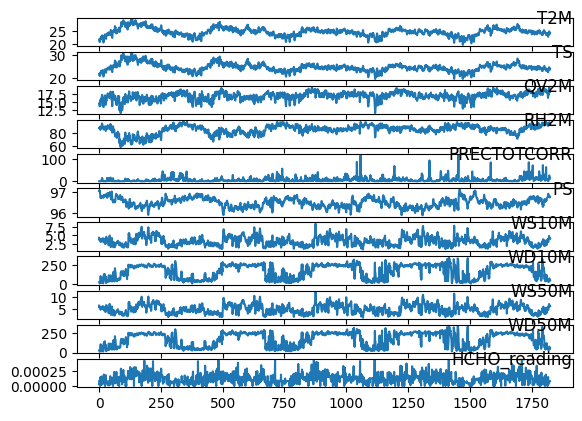

In [28]:
from matplotlib import pyplot as plt

values = Monaragala_data.values
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(Monaragala_data.columns[group], y=0.5, loc='right')
    i += 1


plt.show()

#**HCHO READING VS DATE**


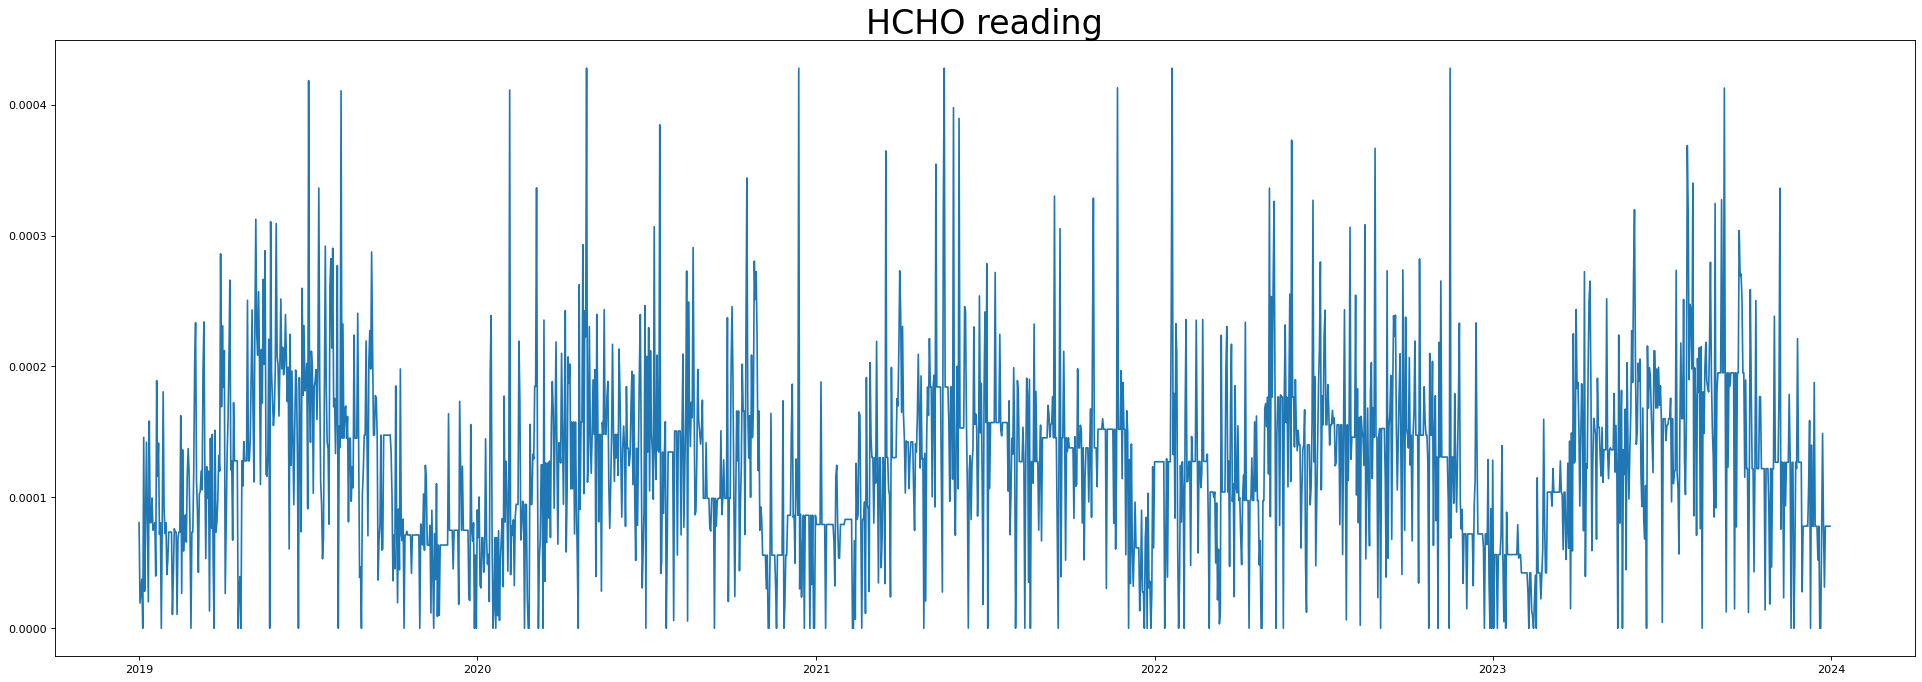

In [29]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('HCHO reading', fontsize=30)

plt.plot(Monaragala_data.HCHO_reading)

#**USING SEASONAL DECOMPOSE TO IDENTIFY TREND AND SEASONALITY**


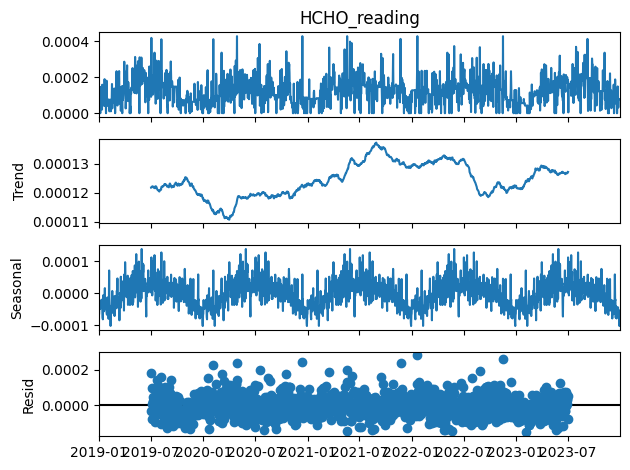

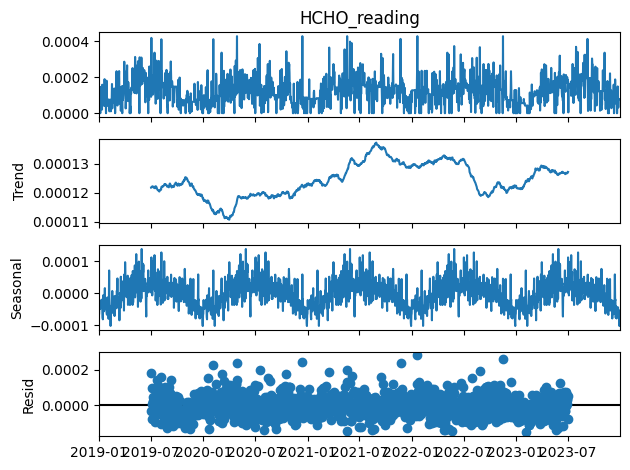

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = Monaragala_data.HCHO_reading
result = seasonal_decompose(series, model='additive', period=365)
result.plot()

#**PLOTING HCHO ROLLING MEAN AND ROLLING STANDARD DEVIATION (WINDOW=30)**


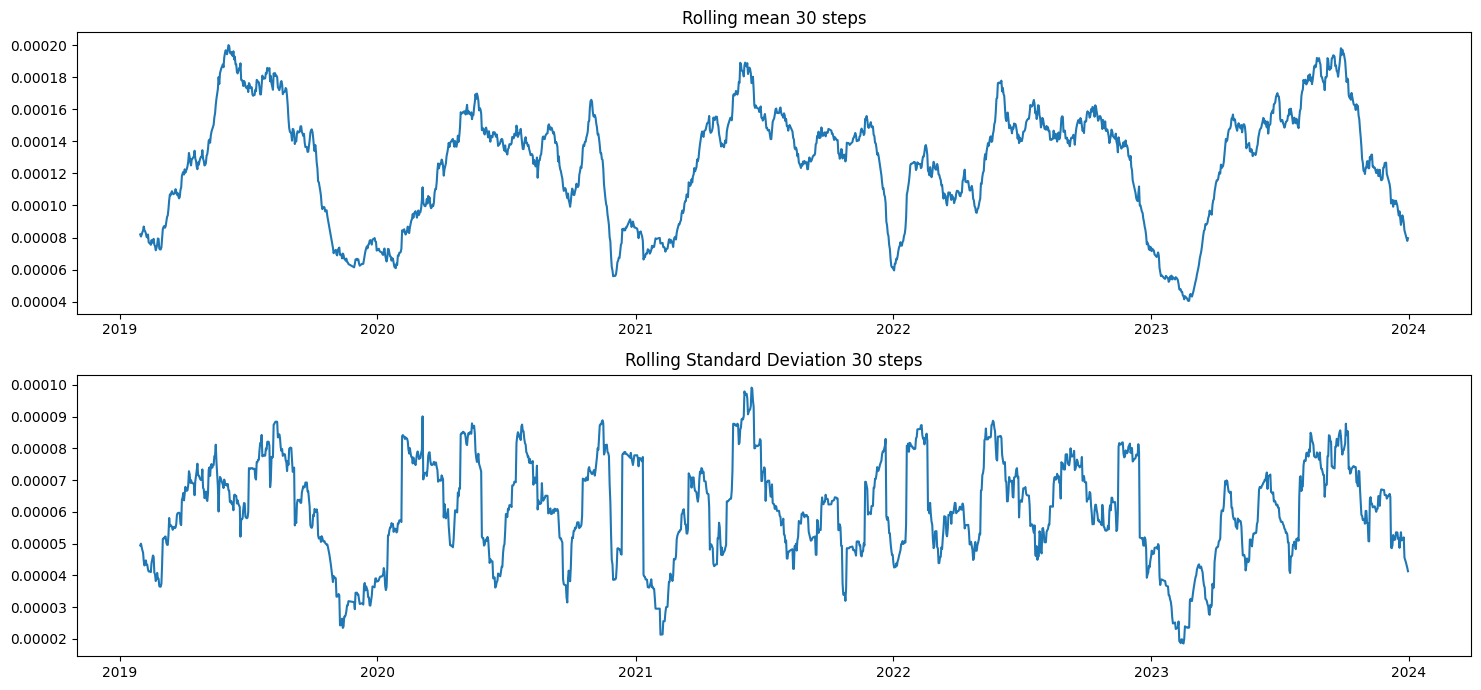

In [31]:
import numpy as np

fig = plt.figure(figsize=(15, 7))
layout = (2, 2)
mv_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
std_ax = plt.subplot2grid(layout, (1, 0), colspan=2)

mm = Monaragala_data.HCHO_reading.rolling(30).mean()
mv_ax.plot(mm)
mv_ax.set_title("Rolling mean 30 steps")

std = Monaragala_data.HCHO_reading.rolling(30).std()
std_ax.plot(std)
std_ax.set_title("Rolling Standard Deviation 30 steps")

plt.tight_layout()

#**HCHO WEEKLY MEAN VS DATE**


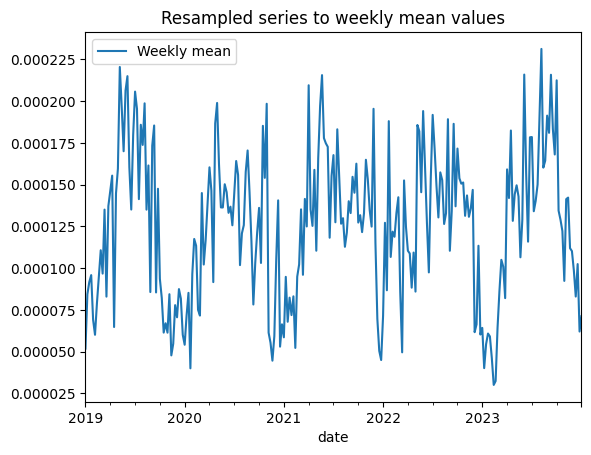

In [32]:
# Looking for weekly seasonality
resample = Monaragala_data.resample('W')
weekly_mean = resample.mean()
weekly_mean.HCHO_reading.plot(label='Weekly mean')
plt.title("Resampled series to weekly mean values")
plt.legend()

#**POLYNOMIAL FIT**


/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-33-8516654136be>:7: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(X, y, degree)


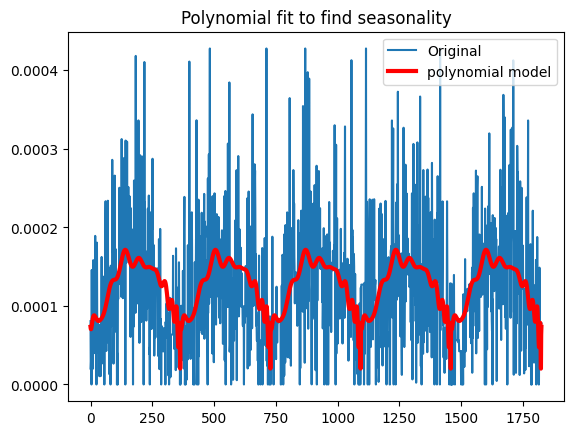

In [33]:
# Fix xticks to show dates
# fit polynomial: x^2*b1 + x*b2 + ... + bn
series = Monaragala_data.HCHO_reading.values
X = [i % 365 for i in range(0, len(series))]
y = series
degree = 100
coef = np.polyfit(X, y, degree)
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
plt.plot(series, label='Original')
plt.plot(curve, color='red', linewidth=3, label='polynomial model')
plt.legend()
plt.title("Polynomial fit to find seasonality")
plt.show()

#**FINDING NOISE**


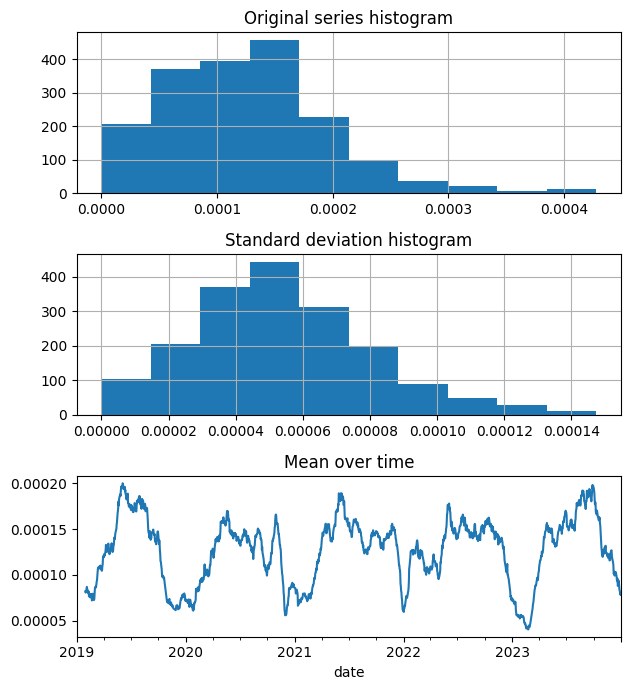

In [34]:
fig = plt.figure(figsize=(12, 7))
layout = (3, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
hist_std_ax = plt.subplot2grid(layout, (1, 0))
mean_ax = plt.subplot2grid(layout, (2, 0))

Monaragala_data.HCHO_reading.hist(ax=hist_ax)
hist_ax.set_title("Original series histogram")

mm = Monaragala_data.HCHO_reading.rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

mm = Monaragala_data.HCHO_reading.rolling(30).mean()
mm.plot(ax=mean_ax)
mean_ax.set_title("Mean over time")
plt.tight_layout()

#**PAC & AC PLOTS**


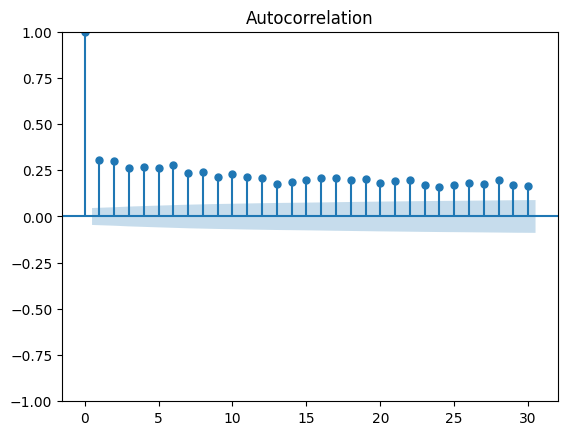

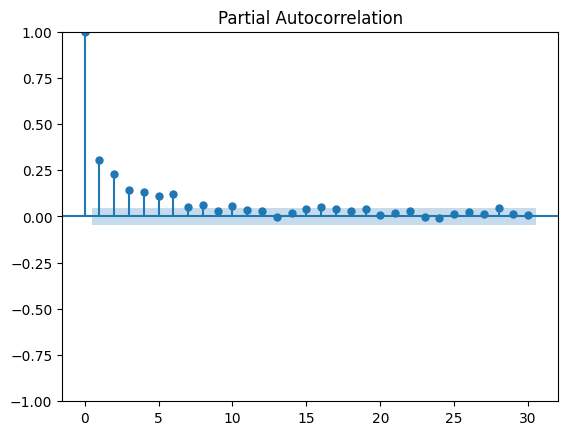

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(series, lags=30)
plot_pacf(series, lags=30)
plt.show()

#**ADF TEST**


In [37]:
from statsmodels.tsa.stattools import adfuller

X = Monaragala_data.HCHO_reading.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.802512
p-value: 0.000054
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
